#     K Nearest Neighbors (KNN) Model for Iris dataset

## Import Standard Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/INDIA/Downloads/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **About the dataset**
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.
- There are 50 observations of each species (setosa, versicolor, virginica).

In [4]:
## Size of data

df.shape

(150, 6)

In [5]:
## Ckecking datatypes

df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
## Statistical summary of data

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
## Checking the missing values in the data

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Data Visualization and Analysis

In [9]:
## Checking the value counts for each class in our dataset

df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot a Pair plot

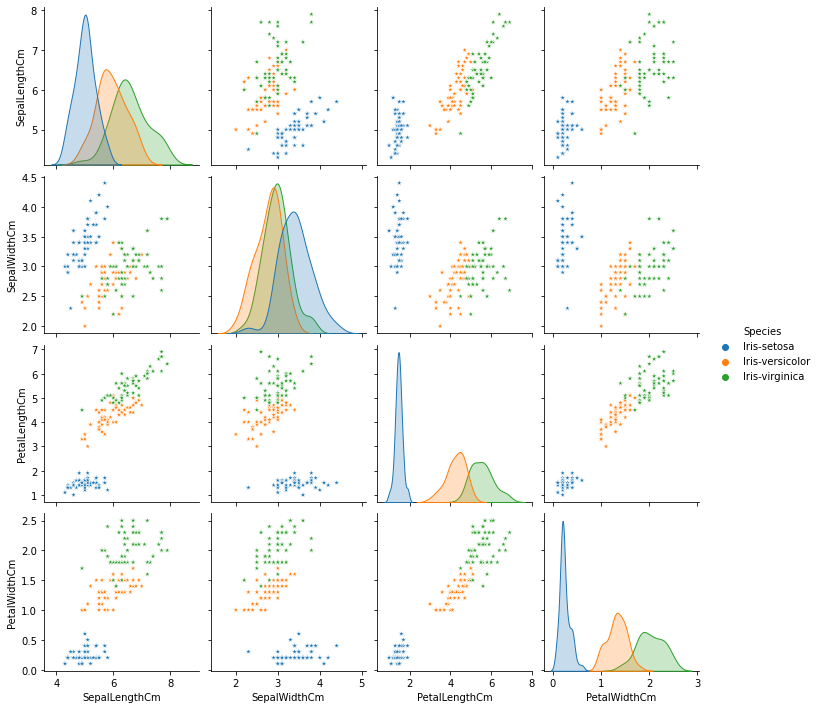

In [10]:
df=df.drop('Id',axis=1)
sns.pairplot(df, hue='Species', markers='*')
plt.show()

- After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in blue) is distinctly different from those of the other two species.
- There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orenge) and iris-virginica (green).

### Check Specices using Violin plot with all the features

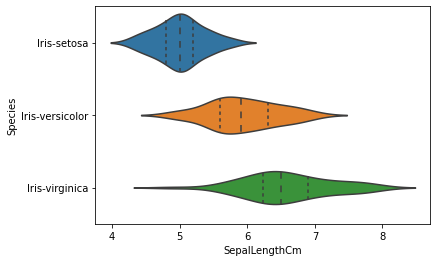

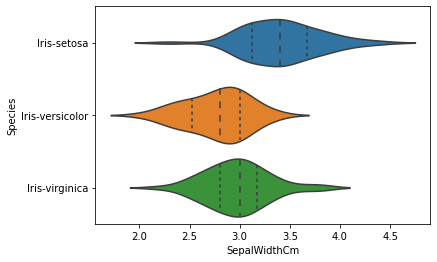

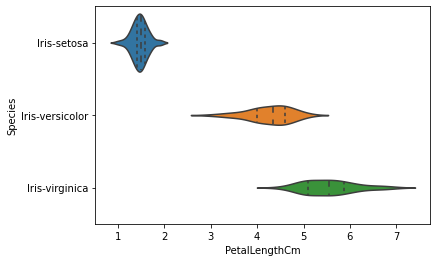

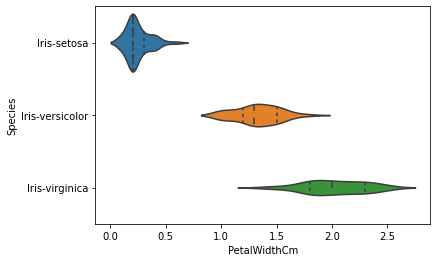

In [11]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()

g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()

g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()

g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [12]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Machine Learning workflow to build a ML Model

### 1. Extract Features

In [13]:
## Target variable

y=df['Species']

In [14]:
## feature variables

x=df.drop('Species',axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
## Features and target should not have null values

x.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [16]:
y.isna().sum()

0

In [17]:
## Features should be in numeric

x.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [18]:
## Features should be of the type array/dataframe

type(x)

pandas.core.frame.DataFrame

In [19]:
## Features should have some rows and columns

x.shape

(150, 4)

### 2. Split the dataset into training and testing dataset

- This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
- There is also a risk of overfitting the training data.

In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23,stratify=y)

In [21]:
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [22]:
## Features should be on the same scale

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- *Features are not in the same scale , so perform Feature scaling to normmalize the data.*
- *Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases*

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
x_train[0:5]

array([[ 1.5915786 ,  0.28857717,  1.22774857,  0.75884164],
       [-0.4611438 ,  2.43755612, -1.34270032, -1.30402884],
       [-0.94413731,  0.50347507, -1.17506235, -0.91724063],
       [ 0.14259808, -0.7859123 ,  0.72483466,  0.50098283],
       [-0.82338893, -0.7859123 ,  0.05428277,  0.24312402]])

In [25]:
x_test[0:5]

array([[-1.06488568,  0.93327086, -1.23094167, -0.78831122],
       [ 0.50484321, -1.21570809,  0.66895533,  0.88777105],
       [-0.4611438 , -1.43060599, -0.05747588, -0.2725936 ],
       [-1.30638244,  0.71837296, -1.23094167, -1.30402884],
       [ 2.43681724,  1.57796454,  1.45126586,  1.01670045]])

## Build a K nearest neighbors (KNN) model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

### 3. Train the model on the training data

*Lets start algorithm with k=4 for now*

In [27]:
k = 4

# Train a Model and Predict 

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

### Test the model on the testing data

In [28]:
knn.score(x_test,y_test)

0.8888888888888888

**Predicting**
* we can use the model to predict the test set

In [29]:
pred=knn.predict(x_test)
pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

### Accuracy Evaluation

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,pred)

0.8888888888888888

### Build a Knn model with various K value and Decide the best K value

In [32]:
## experimenting with different k values

k_range = list(range(1,15))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

In [33]:
scores

[0.9111111111111111,
 0.8888888888888888,
 0.9333333333333333,
 0.8888888888888888,
 0.9333333333333333,
 0.9111111111111111,
 0.9333333333333333,
 0.9111111111111111,
 0.8888888888888888,
 0.9111111111111111,
 0.9111111111111111,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888]

### Plot  model accuracy  for Different number of Neighbors 

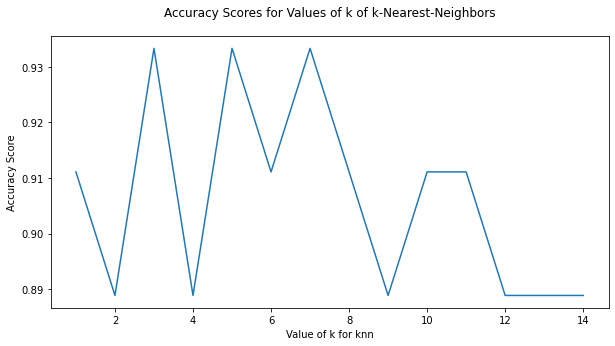

In [34]:
plt.figure(figsize=[10,5])
plt.plot(k_range, scores)
plt.xlabel('Value of k for knn')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors',y=1.05,size=12)
plt.show()

## Choosing KNN to Model Iris Species Prediction with k = 5
- After seeing that plot the values of 3, 5, 7 for 'K' is a pretty good number of neighbors for this model, I use k=5 to fit the model for the entire training dataset.

In [35]:
## With the best value of K

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [36]:
predicted = knn.predict(x_test)
predicted

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
print(confusion_matrix(y_test,predicted))

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


In [39]:
print(classification_report(y_test,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [40]:
accuracy_score(y_test,predicted)

0.9333333333333333